In [ ]:
from getdist import MCSamples, plots
%matplotlib inline  
import numpy as np
import matplotlib.pyplot as plt
import jax.numpy as jnp
from src.hmc import Hmc, Hmc_Vectorized
from src.pdf import Banana, Gaussian, Donut, Lognormal, Gaussian1D, Chisq, GammaDist
from jax import random

names = [r'$x$',r'$y$']

HMC sampling:   0%|          | 0/4992 [00:00<?, ?it/s]

Removed no burn in
Removed no burn in


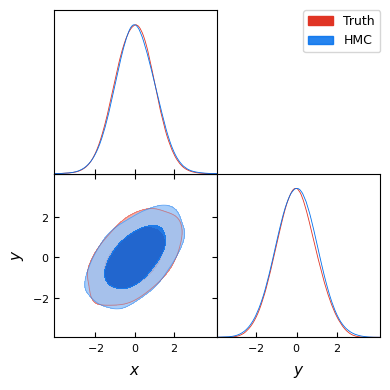

In [15]:
key = random.PRNGKey(42)
q0_array = random.normal(key, (16, 2))  # 16 chains starting from different points

samples = Hmc_Vectorized(q0_array, Nsamples=5000, dt=0.1, Nsteps=10, 
                         L=Gaussian, Mass=jnp.eye(2), burnin=10, rng_key=key)
hmc_samps = MCSamples(samples=samples, names=names,label="HMC")

# ==== Comparison with truth
true_samples = np.random.multivariate_normal(np.zeros(2),jnp.array([[1, 0.5], [0.5, 1]]),5000)
true_samps = MCSamples(samples=true_samples, names=names,label="Truth")
# ====
g = plots.get_subplot_plotter()
g.triangle_plot([true_samps, hmc_samps], filled=True, smooth_scale_1D=1., smooth_scale_2D=1.)

  0%|          | 0/332 [00:00<?, ?it/s]

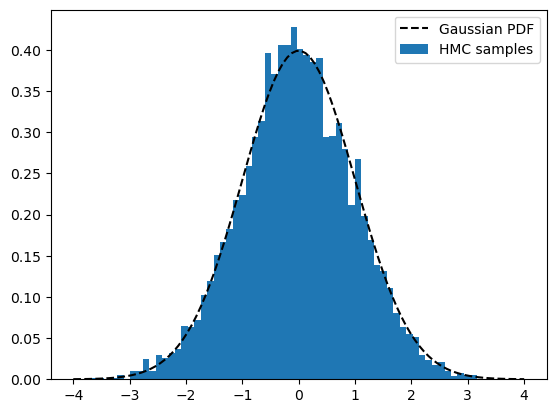

In [6]:
# Ex. Gaussian 1D

key = random.PRNGKey(42)
q0_array = random.normal(key, (16, 1))
samples = Hmc_Vectorized(q0_array, 5000//16, 0.5, 2, Gaussian1D, jnp.eye(1),20)
# ==== Plot expected vs. samps
x_vals = np.linspace(-4, 4, 100)
y_vals = np.array([Gaussian1D(jnp.array([x]), mu=0.0, sigma=1.0) for x in x_vals])/np.sqrt(2*np.pi)

plt.plot(x_vals, y_vals, label='Gaussian PDF',color='black',linestyle='dashed')
plt.hist(samples.ravel(), density=True, label='HMC samples',bins=60)
plt.legend()
plt.show()
